# Chapter 6: Reduction of Dimensionality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data_path = "../data/health.xls"
health = pd.read_excel(data_path, index_col=0)
print(health)

        VG    G    R    B  VB
16-24  243  789  167   18   6
25-34  220  809  164   35   6
35-44  147  658  181   41   8
45-54   90  469  236   50  16
55-64   53  414  306  106  30
65-74   44  267  284   98  20
75+     20  136  157   66  17


In [3]:
# Step 1: Normalize the data to obtain proportions
health_P = health / health.values.sum()

# Step 2: Row and column sums
health_r = health_P.sum(axis=1)
health_c = health_P.sum(axis=0)

# Step 3: Create diagonal matrices
health_Dr = np.diag(health_r)
health_Dc = np.diag(health_c)
health_Drmh = np.diag(1 / np.sqrt(health_r))
health_Dcmh = np.diag(1 / np.sqrt(health_c))

# Step 4: Center and standardize the P matrix
health_P_matrix = health_P.values  # Convert to NumPy array for matrix operations
health_S = np.dot(np.dot(
    health_Drmh,
    (health_P_matrix - np.outer(health_r, health_c))),
    health_Dcmh,
    )

# Step 5: Singular Value Decomposition (SVD)
U, D, Vt = np.linalg.svd(health_S, full_matrices=False)  # Use 'full_matrices=False' to match the dimensions

# Step 6: Calculate the row and column principal coordinates
health_rsc = np.dot(health_Drmh, U)  # Row standard coordinates
health_csc = np.dot(health_Dcmh, Vt.T)  # Column standard coordinates

# Row and column principal coordinates multiplied by singular values
health_rpc = np.dot(health_rsc, np.diag(D))  # Row principal coordinates
health_cpc = np.dot(health_csc, np.diag(D))  # Column principal coordinates

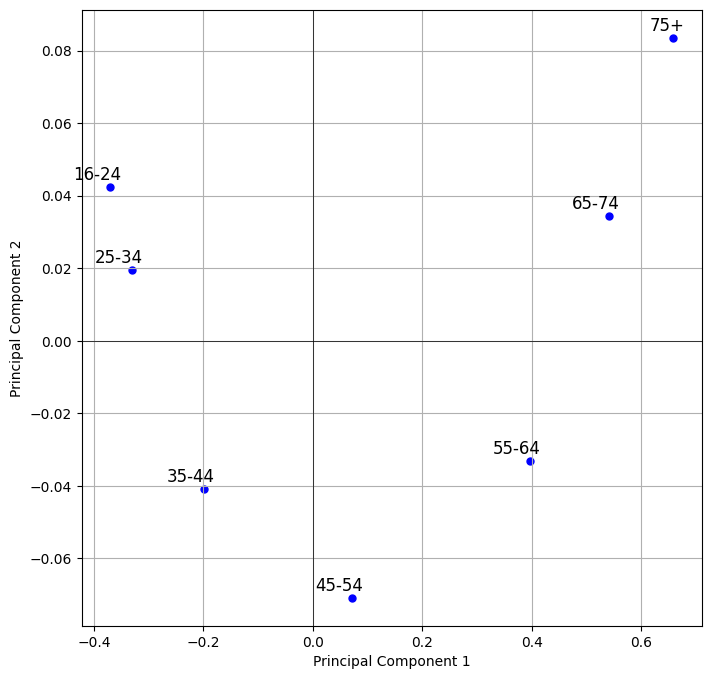

In [4]:
# Step 7: Plot the row principal coordinates (health.rpc)
plt.figure(figsize=(8, 8))

# Plot the row principal coordinates (PC1 vs PC2)
plt.scatter(health_rpc[:, 0], health_rpc[:, 1], color='blue', s=25)

# Add row labels
for i, label in enumerate(health.index):
    plt.text(health_rpc[i, 0] + 0.02, health_rpc[i, 1] + 0.002, label, fontsize=12, ha='right')

# Improve plot aesthetics
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set aspect ratio to be equal to represent distances correctly
# plt.gca().set_aspect('equal')

# plt.title('Row Principal Coordinates (Dimensionality Reduction)')
plt.grid(True)
plt.show()